# Library Imports

In [136]:
import pandas as pd
import numpy as np
from numpy import asarray
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Importing Dataset

In [137]:
dataset = pd.read_csv(r"C:\Users\Mukesh\Downloads\DMT_dataset.csv")

In [138]:
dataset

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [139]:
dataset.isna().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [140]:
dataset.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [141]:
dataset.cost.value_counts()

101.84    839
69.63     763
59.86     726
81.79     698
131.81    619
         ... 
101.57     14
77.70      13
101.75     13
69.15      11
84.11      10
Name: cost, Length: 328, dtype: int64

# Encoding categorical value to numerical values

In [142]:
encoder = LabelEncoder()
for item in dataset:
    dataset[item] = encoder.fit_transform(dataset[item])
dataset

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,4,12,1,545,4972,3,0,2,0,0,...,9,13,13,1,1,1,1,1,3,246
1,4,12,1,420,4719,2,6,2,0,1,...,9,13,13,1,1,1,1,1,3,35
2,4,12,1,288,2178,1,18,2,1,0,...,9,13,13,1,1,1,1,1,3,111
3,4,12,1,288,1776,1,6,2,0,0,...,9,13,13,1,1,1,1,1,5,143
4,4,12,1,321,2317,2,11,2,0,1,...,9,13,13,1,1,1,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,42,7,2,206,2094,0,48,2,0,0,...,3,6,6,1,0,0,0,0,5,137
60424,42,7,2,98,318,0,24,2,1,0,...,3,6,6,1,0,0,0,0,9,70
60425,42,7,2,420,4621,1,47,2,0,1,...,3,6,6,1,0,0,0,0,11,61
60426,42,7,2,604,4674,2,31,0,1,1,...,18,5,5,1,0,0,0,1,9,263


# Cross Validation

In [143]:
features=dataset[dataset.columns[0:len(dataset.columns)-1]]
label = dataset["cost"]
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_rmse = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, features, label, scoring='r2', cv=cv, n_jobs=-1)
scores_mse = cross_val_score(model, features, label, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, features, label, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Example Prediction

In [144]:
features=dataset[dataset.columns[0:len(dataset.columns)-1]]
label = dataset["cost"]
model = XGBRegressor()
model.fit(features, label)
rowNum = 7
print(dataset.loc[rowNum, :])
row = dataset.iloc[rowNum, 0:(len(dataset.columns)-1)]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

food_category                    4
food_department                 12
food_family                      1
store_sales(in millions)       294
store_cost(in millions)       2696
unit_sales(in millions)          1
promotion_name                   6
sales_country                    2
marital_status                   1
gender                           1
total_children                   1
education                        4
member_card                      0
occupation                       2
houseowner                       1
avg_cars_at home(approx)         4
avg. yearly_income               5
num_children_at_home             0
avg_cars_at home(approx).1       4
brand_name                      59
SRP                            127
gross_weight                   323
net_weight                     282
recyclable_package               1
low_fat                          1
units_per_case                   9
store_type                       0
store_city                      12
store_state         

# Single instance of training and testing

In [145]:
train_X, test_X, train_y, test_y = train_test_split(features, label,
                      test_size = 0.3, random_state = 123)

xgb_r = XGBRegressor()
 
# Fitting the model
xgb_r.fit(train_X, train_y)
 
# Predict the model
pred = xgb_r.predict(test_X)

print("Actual")
arr = []
res = []
count = 50
for item in test_y:
    if count > 0:
        arr.append(item)
    count-=1
arr.sort()
print (arr)

print("\nPredicted")
count = 50
for item in pred:
    if count > 0:
        res.append(item)
    count-=1
res.sort()
print (res)
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))


Actual
[1, 1, 25, 27, 29, 33, 45, 50, 51, 53, 61, 75, 76, 89, 102, 103, 106, 113, 118, 127, 127, 131, 136, 137, 142, 149, 151, 152, 157, 160, 169, 171, 172, 178, 188, 193, 208, 212, 225, 234, 245, 249, 252, 255, 261, 269, 285, 287, 298, 303]

Predicted
[3.1172028, 3.1325448, 25.204025, 31.847332, 32.70075, 35.1096, 45.57214, 49.908634, 51.309433, 55.16464, 57.79441, 75.36889, 76.05933, 89.90256, 101.98473, 102.96369, 105.71783, 112.306015, 117.09904, 124.04429, 128.02226, 131.6655, 136.31529, 137.69296, 141.92148, 149.54373, 150.50282, 152.14214, 156.54527, 167.39418, 170.47089, 171.59474, 176.02084, 177.46431, 189.25635, 192.6261, 209.61827, 211.81042, 220.3108, 232.81958, 245.64067, 249.77914, 250.81047, 254.09096, 264.12674, 267.46988, 284.51492, 287.64203, 297.04764, 304.6692]
RMSE :  4.578833


In [146]:
print("R2 Score : % f" %(metrics.r2_score(test_y, pred)))

R2 Score :  0.997761


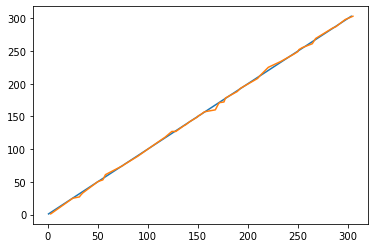

In [147]:
plt.plot(arr, arr, label= 'Actual Values')
plt.plot(res, arr, label= 'Predicted Values')
plt.show()

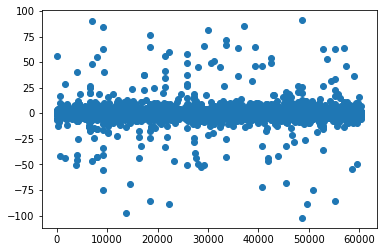

In [148]:
g=plt.plot(test_y - pred, marker='o', linestyle='')

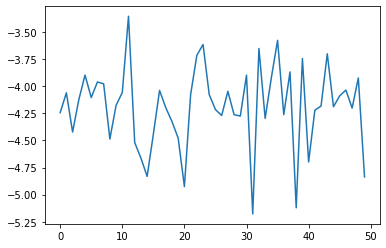

In [149]:
plt.plot(scores)

# Error Bar Plots

R2 score  : 0.99808669 (SD: 0.00028795)
RMSE score: 4.19577529 (SD: 0.32455441)
MSE score : 17.7098659 (SD: 2.71846545)
MAE score : 1.30431365 (SD: 0.11787217)


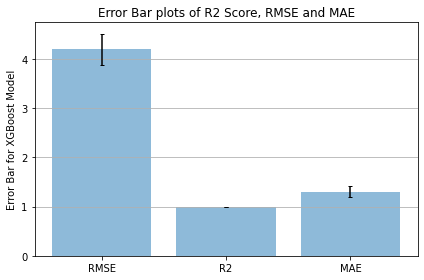

In [150]:
scores_rmse = absolute(scores_rmse)
scores_mse = absolute(scores_mse)
scores_r2 = absolute(scores_r2)
scores_mae = absolute(scores_mae)
labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
CTEs = [absolute(scores_rmse.mean()), absolute(scores_r2.mean()), absolute(scores_mae.mean())]
error = [absolute(scores_rmse.std()), absolute(scores_r2.std()), absolute(scores_mae.std())]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=2)
ax.set_ylabel('Error Bar for XGBoost Model')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)

#Print metric values
print('R2 score  : %.8f (SD: %.8f)' % (scores_r2.mean(), scores_r2.std()) )
print('RMSE score: %.8f (SD: %.8f)' % (scores_rmse.mean(), scores_rmse.std()) )
print('MSE score : %.7f (SD: %.8f)' % (scores_mse.mean(), scores_mse.std()) )
print('MAE score : %.8f (SD: %.8f)' % (scores_mae.mean(), scores_mae.std()) )

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()